In [1]:
"""
Second jupyter notebook containing examples of antisolvent screening.
Solutes subject for testing are 'ibuprofen' and 'acetaminophen'.

Property and calculated data are stored in './data2' folder.
"""

"\nSecond jupyter notebook containing examples of antisolvent screening.\nSolutes subject for testing are 'ibuprofen' and 'acetaminophen'.\n\nProperty and calculated data are stored in './data2' folder.\n"

In [1]:
import sys
import numpy as np
import pandas
import matplotlib.pyplot as plt
import ternary
import json

sys.path.append("..")
from cosmosac2 import COSMOMolecule, COSMOSAC
from ternary_calculate import TernaryCalculate as tc
from antisolvent_calculate import AntisolventCalculate as ac

In [3]:
# Solute properties
ibuprofen = {
    "temp_melt": 347.6,
    "enth_fus": 27940,
    "file": "../cosmo_file/UD1264.cosmo",
    "name": "IBUPROFEN",
}

In [4]:
# Load solvent data
with open("./data2/solvent_properties.json", "r") as solvent_json:
    solvent_data = json.load(solvent_json)

# Load antisolvent data
with open("./data2/antisolvent_properties.json", "r") as antisolv_json:
    antisolv_data = json.load(antisolv_json)

System: IBUPROFEN-ETHANOL-ETHYLENE_GLYCOL
Initializing system...
Initialize complete!
System: IBUPROFEN-ETHANOL-ACETIC_ACID
Initializing system...
Initialize complete!
System: IBUPROFEN-ETHANOL-PHENOL
Initializing system...
Initialize complete!
System: IBUPROFEN-ETHANOL-BENZENE
Initializing system...
Initialize complete!
System: IBUPROFEN-ETHANOL-TOLUENE
Initializing system...
Initialize complete!
System: IBUPROFEN-ETHANOL-N-BUTANE
Initializing system...
Initialize complete!


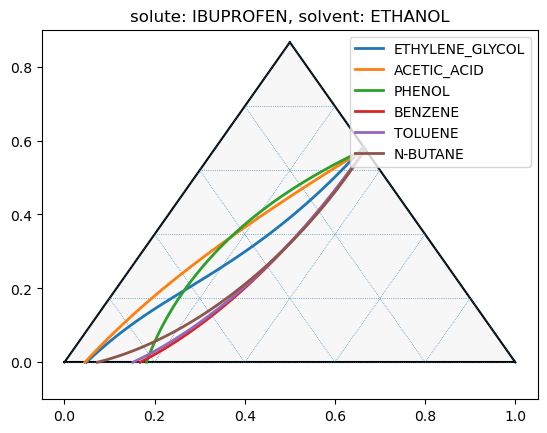

In [5]:
system = tc()
system.add_solute(**ibuprofen)
# Test with 1st element of solvent, ethanol
system.add_solvent(**solvent_data[0])
# Plot on ternary diagram
fig1, tax = ternary.figure(scale=1.0)
tax.boundary()
tax.gridlines(multiple=0.2)
tax.set_title(f"solute: {system.mole_name[0]}, solvent: {system.mole_name[1]}")
for antisolvent in antisolv_data:
    system.add_antisolvent(**antisolvent)
    calculator = ac(system, trace=False)
    tax.plot(calculator.ternary_data, linewidth=2.0, label=f"{system.mole_name[2]}")
    result = calculator.get_data(
        export="csv",
        file_name=f"./data2/{system.mole_name[0]}_{system.mole_name[1]}_{system.mole_name[2]}",
    )
    system.clear_antisolvent()
tax.legend(loc="upper right")